# Obtención do diagrama P-x para unha temperatura de 115 ºC para unha mestura de hepano e octano.

In [19]:
import numpy as np

In [20]:
# Parámetros de Antoine

# heptano
A_heptano = 4.02832
B_heptano = 1268.636
C_heptano = -56.199

#Octano
A_octano=4.04867
B_octano=1355.126
C_octano=-63.633

# Alternativa
# A = [A_heptano, A_octano]
# B=[B_heptano, B_octano]
# A[0] = A del heptano

# Dato: temperatura
T = 115 + 273.15 # K

# Cálculo da presión de vapor dos compoñentes puros (ecuación de Antoine)

In [21]:
pv_heptano = 10 ** ( A_heptano - B_heptano / ( T + C_heptano ) ) # bar
pv_octano  = 10 ** ( A_octano  - B_octano  / ( T + C_octano  ) ) # bar
print(f'A presión de vapor do heptano puro é de {pv_heptano:6.4f} bar.') # compoñente mais volátil, maior presión de vapor
# print('A presión de vapor do heptano puro é de {:6.4f} bar.'.format(pv_heptano)) #más volátil, mayor presión de vapor
print(f'A presión de vapor do heptano puro é de {pv_octano:6.4f} bar.') # compoñente mais volátil, maior presión de vapor
# print('A presión de vapor do octano puro {:6.4f} bar.'.format(pv_octano))

A presión de vapor do heptano puro é de 1.6090 bar.
A presión de vapor do heptano puro é de 0.7462 bar.


Text(0.5, 1.0, 'Diagrama P-x,y')

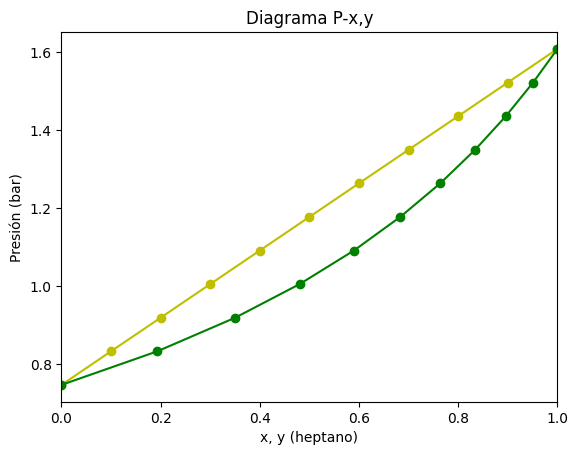

In [22]:
import matplotlib.pyplot as plt
# Vector de valores de x
x_heptano = np.linspace(0,1,11)

# Calcula a presión total a partires das presións de vapor e as fraccións molares na fase vapor
P_total = x_heptano * pv_heptano + ( 1 - x_heptano ) * pv_octano

# Cálculo Presións de burbulla
P_burbulla = x_heptano * pv_heptano + ( 1 - x_heptano ) * pv_octano

#Calcular los valores de y
y_heptano = pv_heptano * x_heptano / P_burbulla

#Presiones de rocío
P_orballo = 1 / ( y_heptano / pv_heptano + ( 1 - y_heptano ) / pv_octano )

#Representación del diagrama P-x,y
plt.plot(x_heptano, P_burbulla, 'yo-', y_heptano, P_orballo, 'go-')
plt.xlim(0,1)
plt.xlabel('x, y (heptano)')
plt.ylabel('Presión (bar)')
plt.title('Diagrama P-x,y')

## Aparatdo 2 . Diagrama T-xy a partires da presión total dada

In [23]:
from scipy.optimize import fsolve

In [24]:
#Datos do exercicio

P_t = 1.5 #bar
x_heptano = np.linspace(0,1,11)

# Suponse unha temperatura de partida

T_guess=396

# Créanse dúas listas nas que se almacenarán os datos de temperatura e fraccións molares do heptano, para cada valor de x

lista_temperatura=[]
lista_y=[]

# Definiranse as funcións para obter as presións de saturación do heptano e o octano

def p_sat_heptano(T):
    return 10  ** ( A_heptano - B_heptano / ( T + C_heptano ) )

def p_sat_octano(T):
    return 10 ** ( A_octano - B_octano / ( T + C_octano ) )

# Créase un lazo que devolve o valor da temperatura e a fracción molar do vapor para cada valor de x

for i in x_heptano:
    def fmin(T):
        return i*p_sat_heptano(T)/P_t+(1-i)*p_sat_octano(T)/P_t-1
    solucion=fsolve(fmin,T_guess)
    lista_temperatura.append(solucion[0])
    y_heptano=i*p_sat_heptano(solucion)/P_t
    lista_y.append(y_heptano[0])

print(lista_temperatura) # valores de temperatura calculados
print(lista_y) # valores de y calculados

[413.5615852273091, 409.77113336473025, 406.2684364969948, 403.0216612183846, 400.00305716655544, 397.18844969691617, 394.55676804690006, 392.0896214256247, 389.77092633460484, 387.58658343897787, 385.52419985536085]
[0.0, 0.1837276326189331, 0.33830109800891695, 0.4693199994809487, 0.581154434977709, 0.6772413410638028, 0.7603047808262194, 0.832520410718438, 0.895638942399593, 0.9510793956603304, 1.0000000000003693]


Text(0.5, 1.0, 'Diagrama T-x,y')

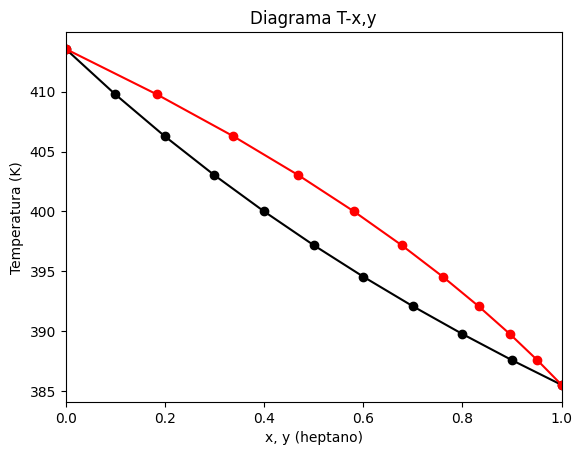

In [25]:
# Representación do diagrama T-xy

import matplotlib.pyplot as plt
plt.plot(x_heptano, lista_temperatura, 'ko-', lista_y, lista_temperatura, 'ro-')
plt.xlim(0,1)
plt.xlabel('x, y (heptano)')
plt.ylabel('Temperatura (K)')
plt.title('Diagrama T-x,y')

In [26]:
#También se puede realizar con fsolve aplicado a la ecuación de Antoine, y no al sumatorio de y - 1
z=np.linspace(0,1, num=11) #composición inicial

# Funciónes para determinar as presións de saturación dos dous compoñentes

def Psat1(T):
    return 10**(A_heptano-B_heptano/(T+C_heptano))
def Psat2(T):
    return 10**(A_octano-B_octano/(T+C_octano))

#Datos do enunciado
y=z
P = 1.5 #bar
from scipy.optimize import fsolve


def fun1(T):
    return P - 10**(A_heptano-B_heptano/(T+C_heptano)) # a qué temperatura P externa es igual al otro término
Tinf=fsolve(fun1, 350) # 350K valor inicial suposto
                       # Tinf = temperatura de fervura do heptano

def fun2(T):
    return P - 10**(A_octano-B_octano/(T+C_octano))
Tsup=fsolve(fun2, 373) # Tsup = temperatura de fervura do octano

print('A temperatura á que hierve o heptano á presión externa é {:5.2f} K.'.format(Tinf[0]))
print('A temperatura á que hierve o octano  á presión externa é {:5.2f} K.'.format(Tsup[0]))


A temperatura á que hierve o heptano á presión externa é 385.52 K.
A temperatura á que hierve o octano  á presión externa é 413.56 K.


Text(0.5, 1.0, 'Diagrama T-x, y')

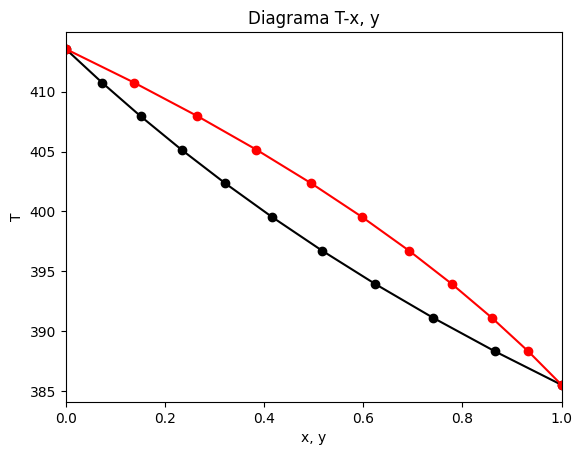

In [27]:
T=np.linspace(Tinf,Tsup, num=11)
x = (P-Psat2(T))/(Psat1(T)-Psat2(T))
y=x*Psat1(T)/P
plt.plot(x, T,'ko-', y,T,'ro-')
plt.xlim(0,1)
plt.xlabel('x, y')
plt.ylabel('T')
plt.title('Diagrama T-x, y')